In [1]:
library(ggplot2)
library(dplyr)
library(paletteer)
library(ggpubr)

library(RColorBrewer)
library(scales)
library(pals)

library(Seurat)
library(ArchR)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching SeuratObject


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`-,__ ___/'  --,-`-===================##========>
       \               '        ##_______ _____ ,--,__,=##,

In [3]:
dataset_ls <- c("Buenrostro_2018", "candidate1", "Cell_line_mixing", "Chen_2019",  "PBMC_multiomics") #"Ma_2019",
k_ls <- c(9, 13, 10, 13, 15)

# Cell_line_mixing

In [4]:
i <- 3
dataset <- dataset_ls[i]
k_optimal <- k_ls[i]

setwd(paste0("/home/siluo/public/SiyuanLuo/projects/benchmark/outputs/", dataset))
df <- read.table(file="meta_info_for_evaluation.tsv", sep="\t", header=TRUE)
df_metrics <- read.table(file="metrics_value.tsv", sep="\t", header=TRUE)

df_umap <- unique(df_metrics[,c('method','feature_type','tile_size',
                                  'distance','ndim','long_method',"snn_file")])

## ArchR_tiles

In [5]:
df_umap %>% filter(long_method == "ArchR_tiles")

,method,feature_type,tile_size,distance,ndim,long_method,snn_file
,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<chr>
833,ArchR,tiles,500,default,15,ArchR_tiles,Cell_line_mixing/clustering/ArchR/tiles/500/default/15/sobj_SNN.RDS
937,ArchR,tiles,500,default,30,ArchR_tiles,Cell_line_mixing/clustering/ArchR/tiles/500/default/30/sobj_SNN.RDS
1041,ArchR,tiles,500,default,50,ArchR_tiles,Cell_line_mixing/clustering/ArchR/tiles/500/default/50/sobj_SNN.RDS
1145,ArchR,tiles,500,default,100,ArchR_tiles,Cell_line_mixing/clustering/ArchR/tiles/500/default/100/sobj_SNN.RDS


Loading required package: Signac



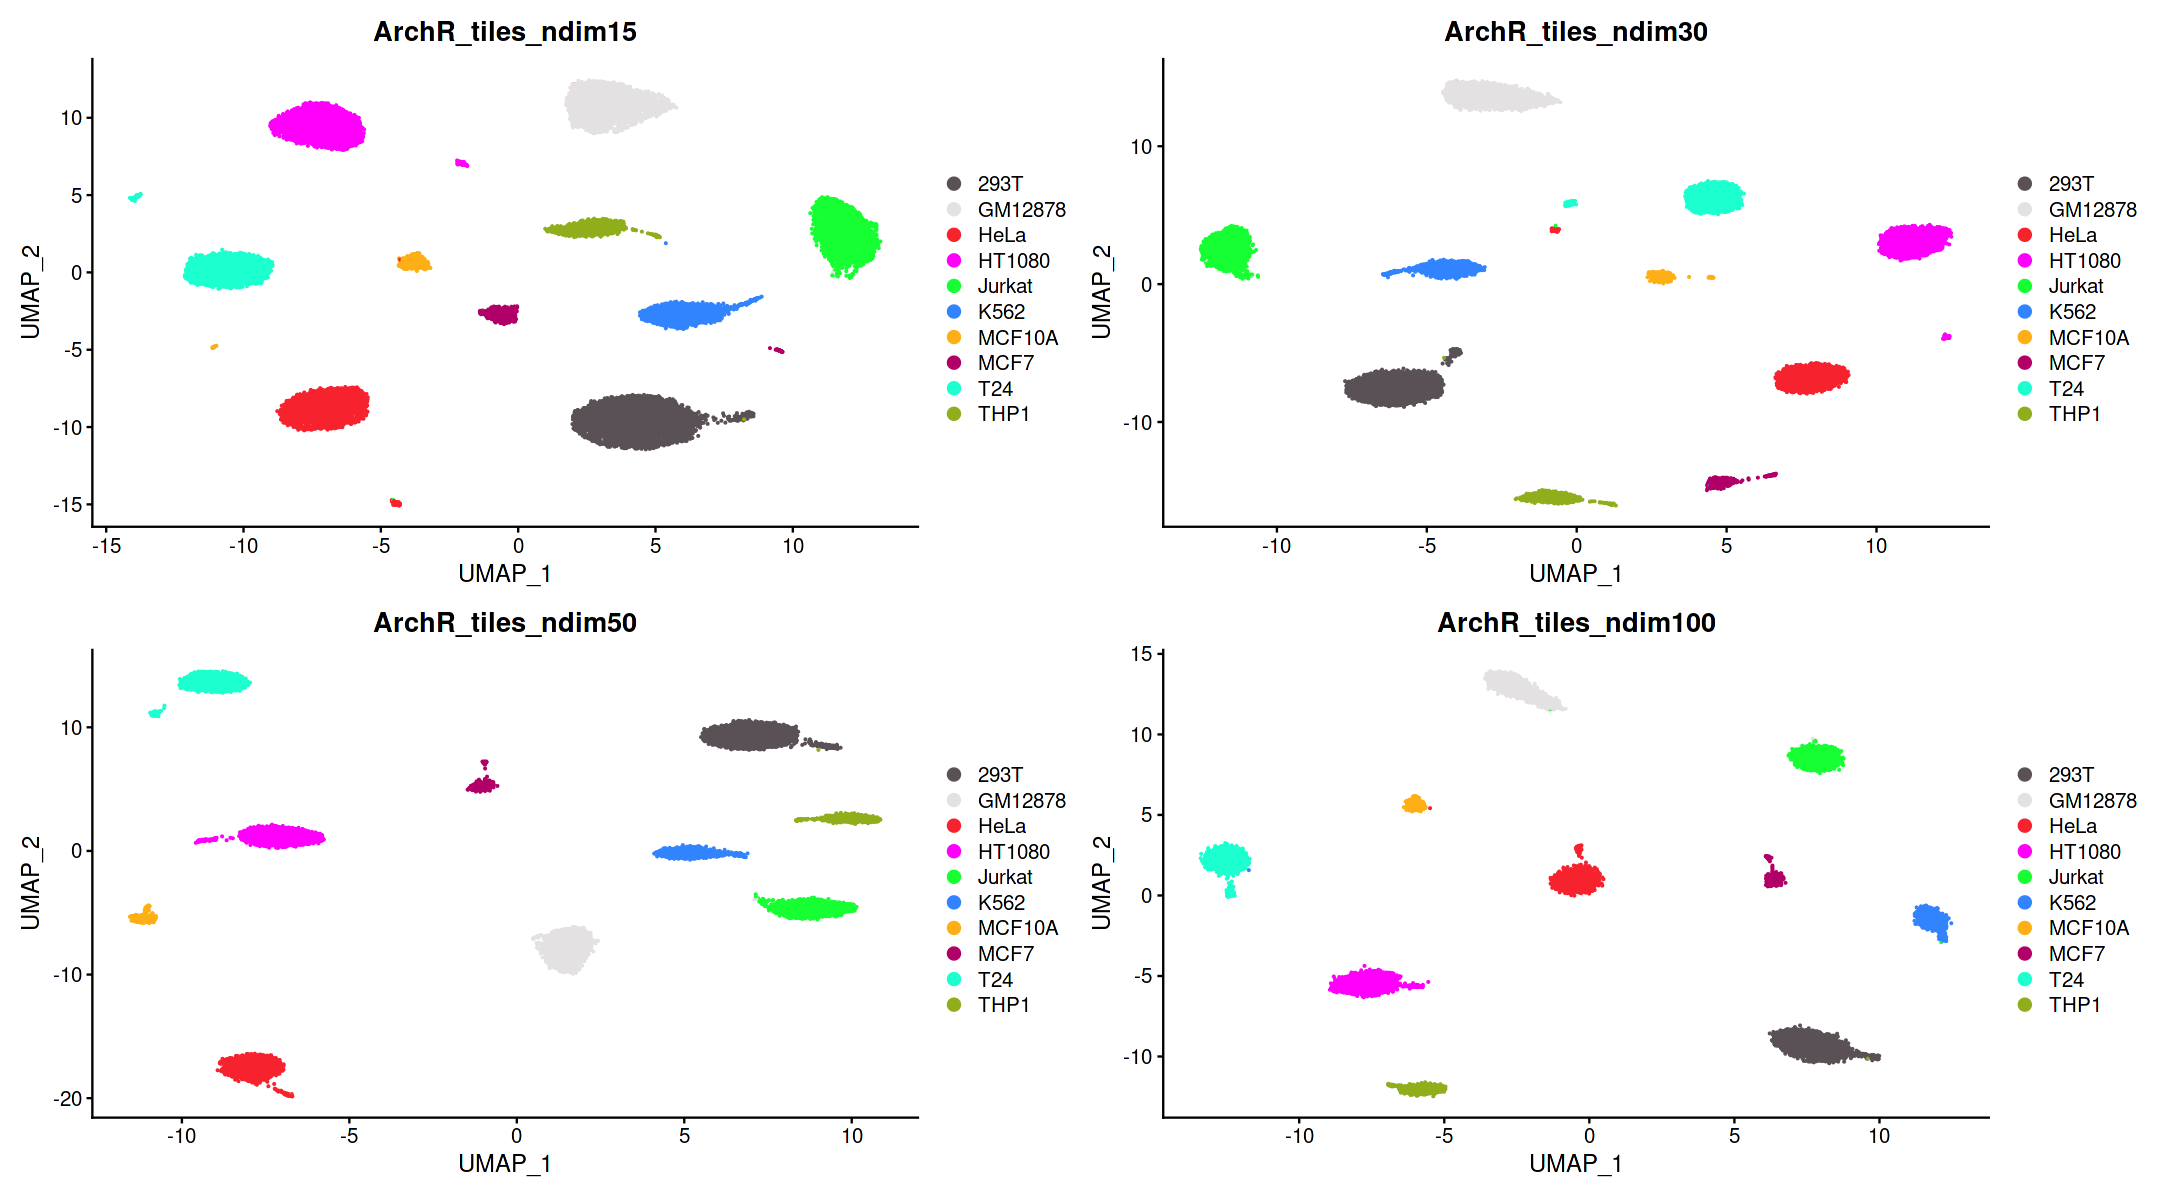

In [6]:
lm <- "ArchR_tiles"

options(repr.plot.width=18, repr.plot.height=10)
n <- 15
a <- df_umap %>% filter(long_method == lm) %>% filter(ndim == n)
sobj_file <- a[1,"snn_file"]
sobj1 <- readRDS(sobj_file)
p1 <- DimPlot(sobj1, reduction = "umap", label = F, repel=T, 
    group.by = "ground_truth", cols="polychrome")  + ggtitle(paste0(lm,"_ndim",n)) 

n <- 30
a <- df_umap %>% filter(long_method == lm) %>% filter(ndim == n)
sobj_file <- a[1,"snn_file"]
sobj2 <- readRDS(sobj_file)
p2 <- DimPlot(sobj2, reduction = "umap", label = F, repel=T, 
    group.by = "ground_truth", cols="polychrome")  + ggtitle(paste0(lm,"_ndim",n)) 

n <- 50
a <- df_umap %>% filter(long_method == lm) %>% filter(ndim == n)
sobj_file <- a[1,"snn_file"]
sobj3 <- readRDS(sobj_file)
p3 <- DimPlot(sobj3, reduction = "umap", label = F, repel=T, 
    group.by = "ground_truth", cols="polychrome")  + ggtitle(paste0(lm,"_ndim",n))

n <- 100
a <- df_umap %>% filter(long_method == lm) %>% filter(ndim == n)
sobj_file <- a[1,"snn_file"]
sobj4 <- readRDS(sobj_file)
p4 <- DimPlot(sobj4, reduction = "umap", label = F, repel=T, 
    group.by = "ground_truth", cols="polychrome")  + ggtitle(paste0(lm,"_ndim",n))  

print(p1+p2+p3+p4)

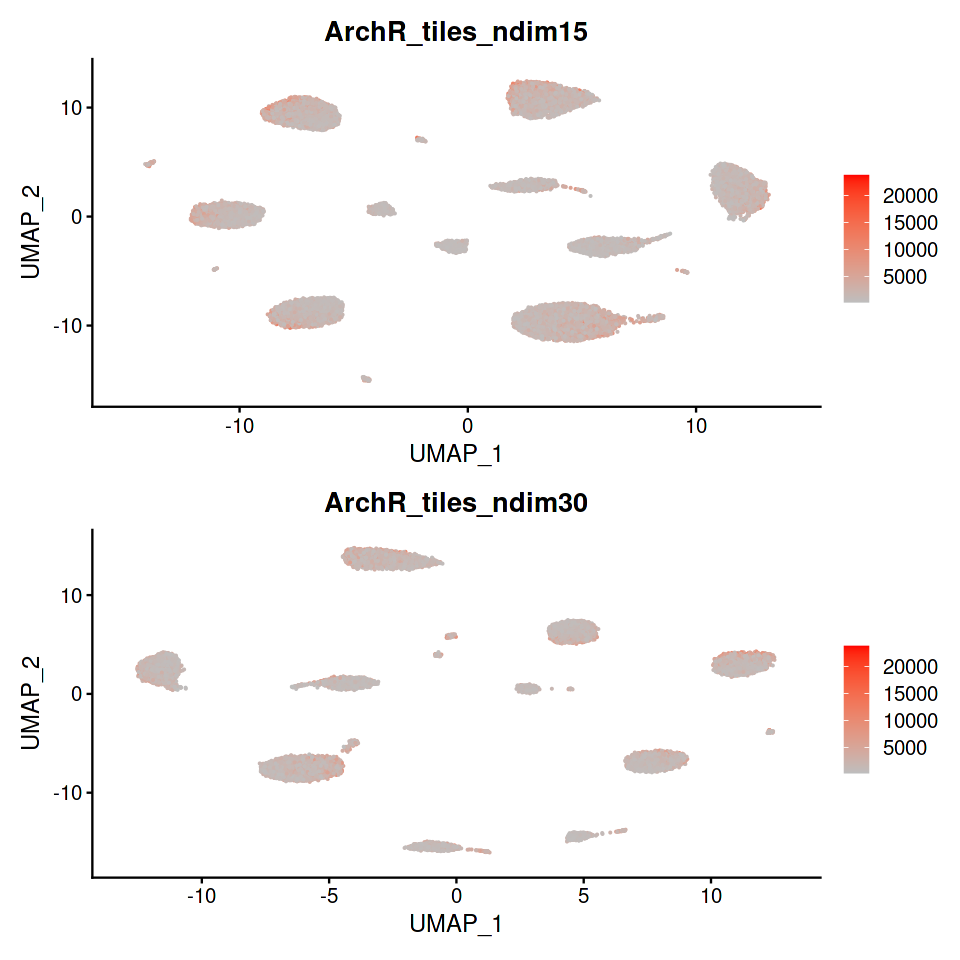

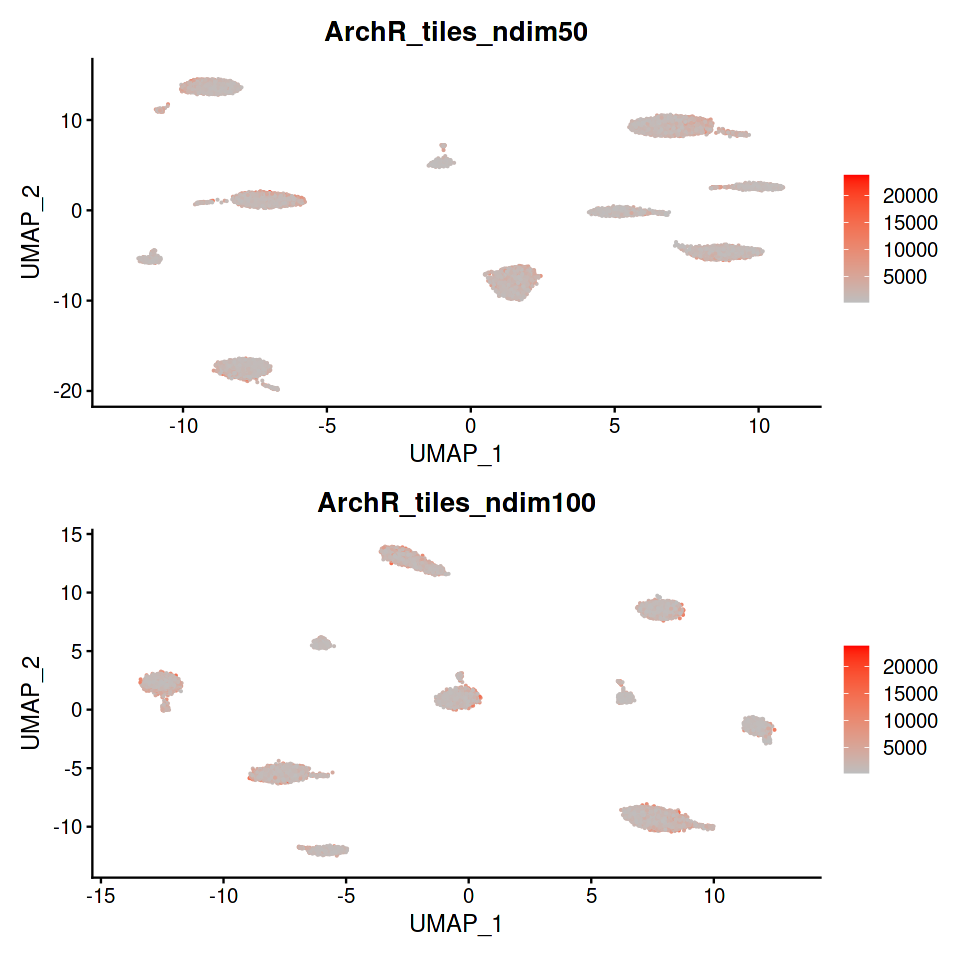

In [7]:
options(repr.plot.width=8, repr.plot.height=8)
par(mfrow=c(2,2))
n <- 15
p5 <- FeaturePlot(sobj1, features = c("nCount_all_cell_peaks"), cols = c("grey", "red")) + ggtitle(paste0(lm,"_ndim",n))
n <- 30
p6 <- FeaturePlot(sobj2, features = c("nCount_all_cell_peaks"), cols = c("grey", "red")) + ggtitle(paste0(lm,"_ndim",n)) 
n <- 50
p7 <- FeaturePlot(sobj3, features = c("nCount_all_cell_peaks"), cols = c("grey", "red")) + ggtitle(paste0(lm,"_ndim",n)) 
n <- 100
p8 <- FeaturePlot(sobj4, features = c("nCount_all_cell_peaks"), cols = c("grey", "red")) + ggtitle(paste0(lm,"_ndim",n)) 

print(p5+p6)
print(p7+p8)

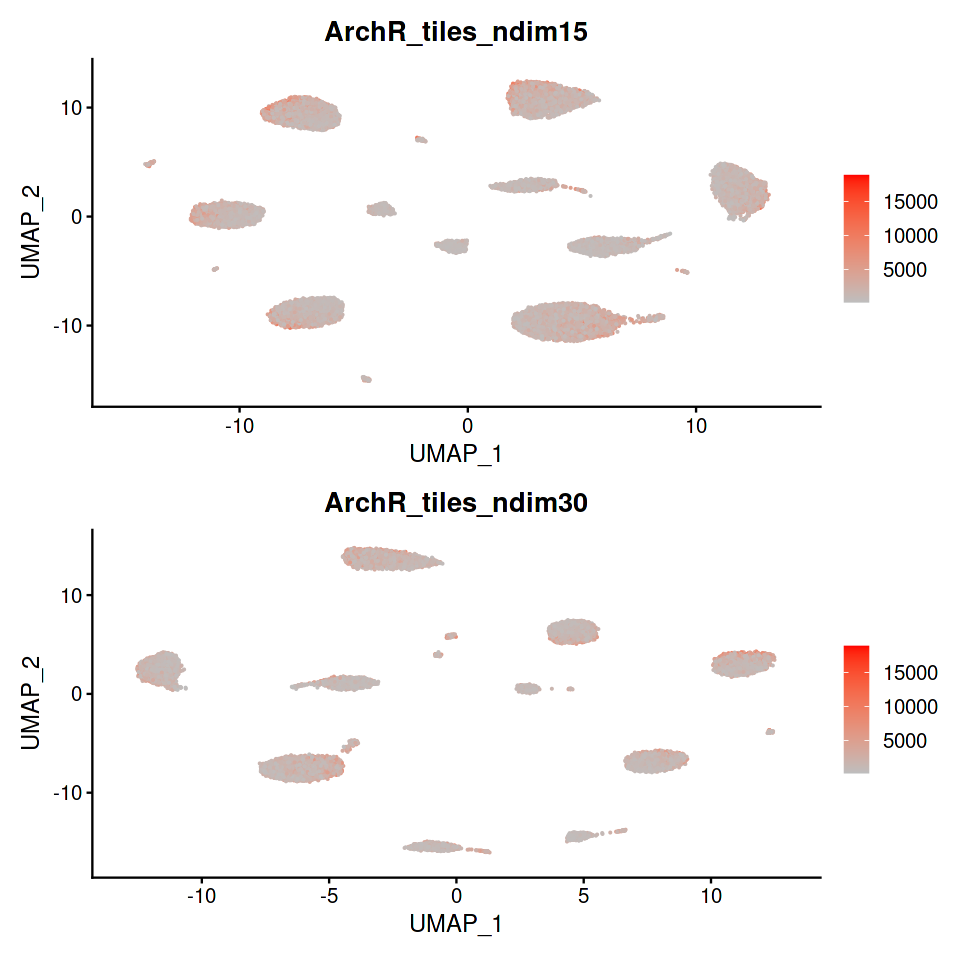

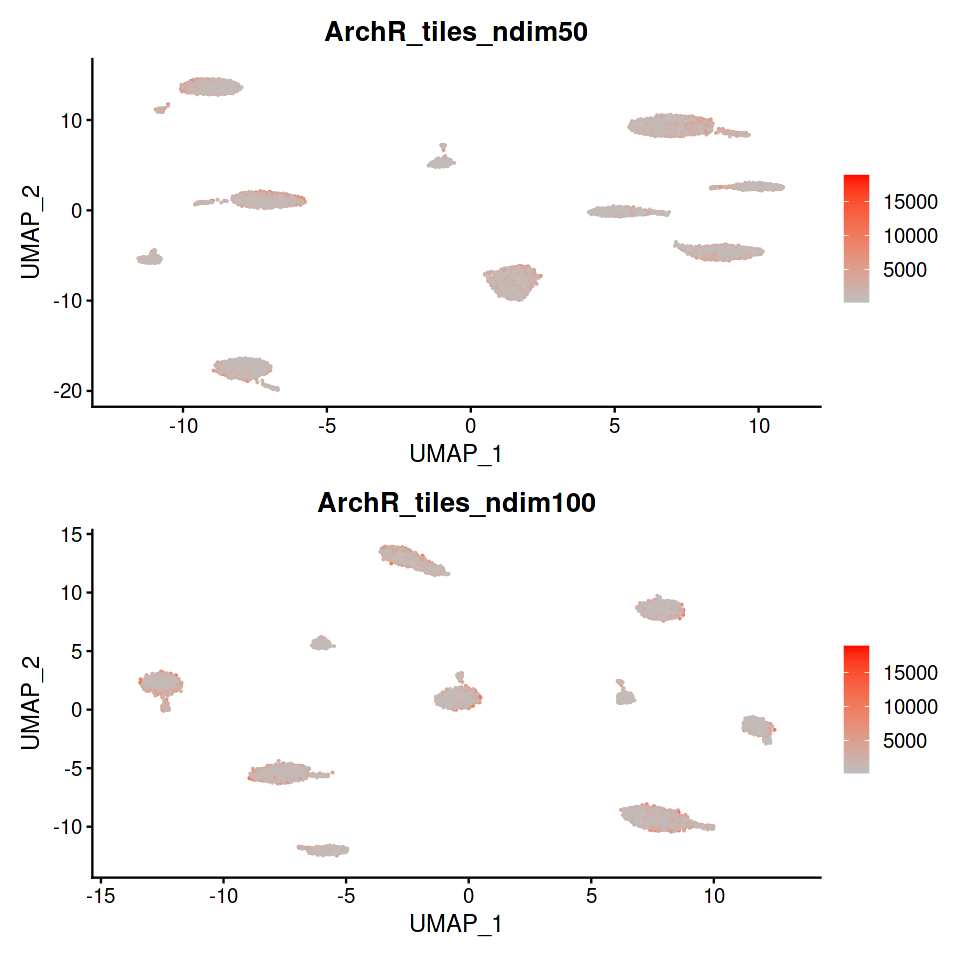

In [8]:
options(repr.plot.width=8, repr.plot.height=8)
par(mfrow=c(2,2))
n <- 15
p5 <- FeaturePlot(sobj1, features = c("nFeature_all_cell_peaks"), cols = c("grey", "red")) + ggtitle(paste0(lm,"_ndim",n))
n <- 30
p6 <- FeaturePlot(sobj2, features = c("nFeature_all_cell_peaks"), cols = c("grey", "red")) + ggtitle(paste0(lm,"_ndim",n)) 
n <- 50
p7 <- FeaturePlot(sobj3, features = c("nFeature_all_cell_peaks"), cols = c("grey", "red")) + ggtitle(paste0(lm,"_ndim",n)) 
n <- 100
p8 <- FeaturePlot(sobj4, features = c("nFeature_all_cell_peaks"), cols = c("grey", "red")) + ggtitle(paste0(lm,"_ndim",n)) 

print(p5+p6)
print(p7+p8)

In [9]:
# compute TSS enrichment score per cell
sobj1 <- TSSEnrichment(object = sobj1, fast = TRUE)

Extracting TSS positions

Extracting fragments at TSSs


Computing TSS enrichment score



In [10]:
sobj2 <- TSSEnrichment(object = sobj2, fast = TRUE)
sobj3 <- TSSEnrichment(object = sobj3, fast = TRUE)
sobj4 <- TSSEnrichment(object = sobj4, fast = TRUE)

Extracting TSS positions

Extracting fragments at TSSs


Computing TSS enrichment score

Extracting TSS positions

Extracting fragments at TSSs


Computing TSS enrichment score

Extracting TSS positions

Extracting fragments at TSSs


Computing TSS enrichment score



In [25]:
head(sobj1[[]])

,orig.ident,nCount_all_cell_peaks,nFeature_all_cell_peaks,ground_truth,TSS.enrichment,TSS.percentile
,<fct>,<dbl>,<int>,<fct>,<dbl>,<dbl>
CellLine_HighLoading+AACAAAGTCATCGCAA-1,CellLine,3401,3166,293T,1.460608,0.46
CellLine_HighLoading+TTAGGTGGTCGGCTGT-1,CellLine,7097,6515,HT1080,1.435299,0.43
CellLine_HighLoading+TCAAGCACAAGGGTAC-1,CellLine,3634,3434,Jurkat,2.189477,0.88
CellLine_HighLoading+TAAGCCAGTCCAACCG-1,CellLine,1852,1779,HT1080,2.017982,0.83
CellLine_HighLoading+AACTGGTTCATCATGG-1,CellLine,2636,2509,GM12878,2.317682,0.90
CellLine_LowLoading+GGGACCTCACCTGGTG-1,CellLine,6781,5994,T24,1.429999,0.42


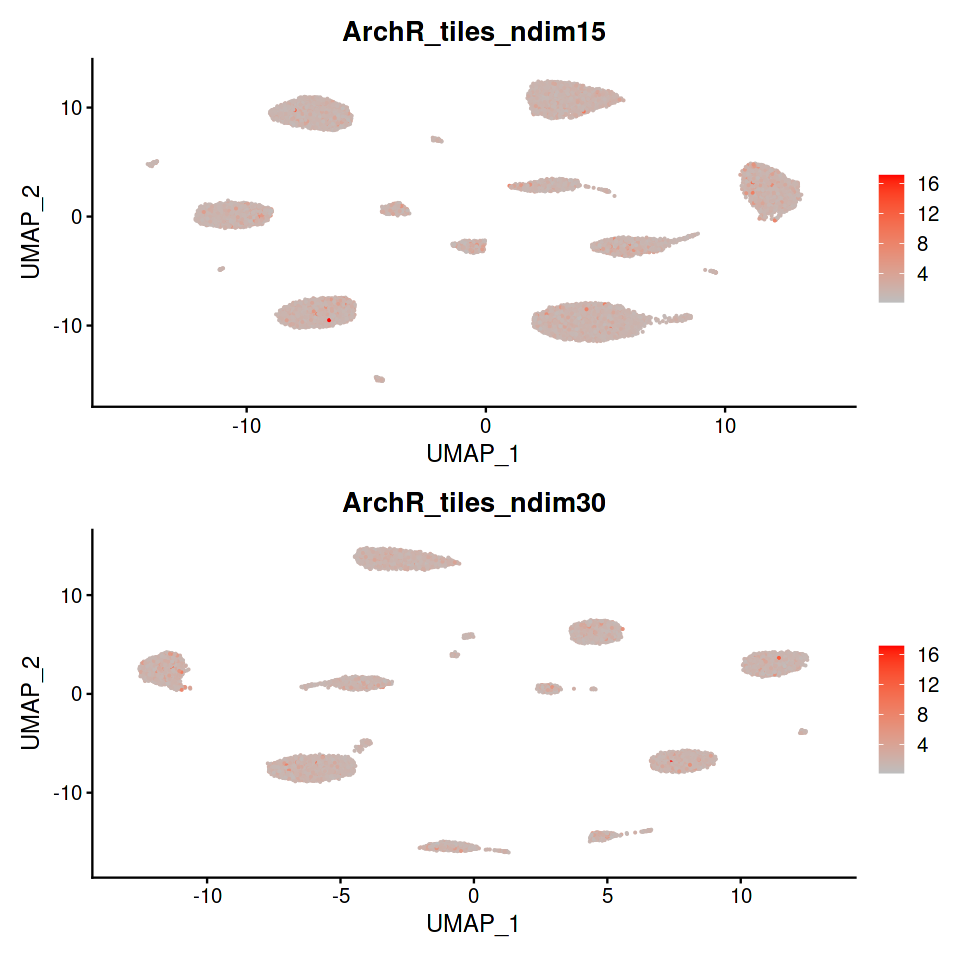

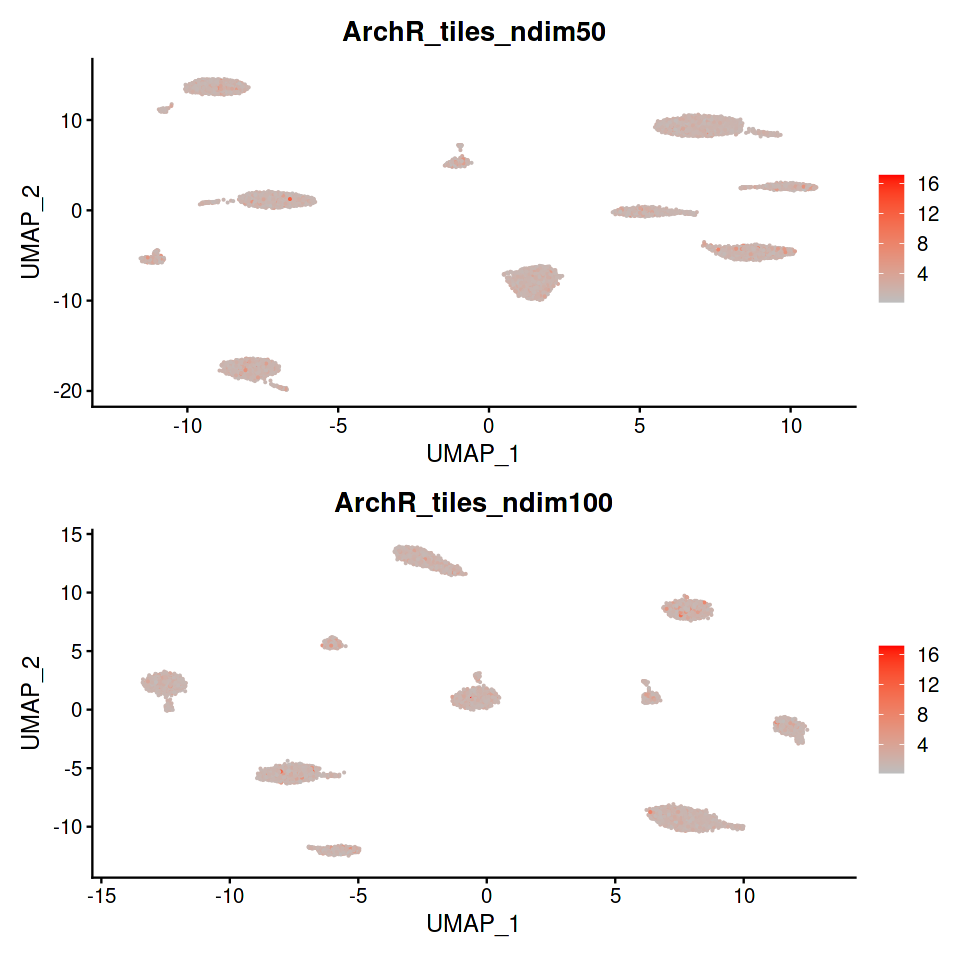

In [11]:
options(repr.plot.width=8, repr.plot.height=8)
par(mfrow=c(2,2))
n <- 15
p5 <- FeaturePlot(sobj1, features = c("TSS.enrichment"), cols = c("grey", "red")) + ggtitle(paste0(lm,"_ndim",n))
n <- 30
p6 <- FeaturePlot(sobj2, features = c("TSS.enrichment"), cols = c("grey", "red")) + ggtitle(paste0(lm,"_ndim",n)) 
n <- 50
p7 <- FeaturePlot(sobj3, features = c("TSS.enrichment"), cols = c("grey", "red")) + ggtitle(paste0(lm,"_ndim",n)) 
n <- 100
p8 <- FeaturePlot(sobj4, features = c("TSS.enrichment"), cols = c("grey", "red")) + ggtitle(paste0(lm,"_ndim",n)) 

print(p5+p6)
print(p7+p8)

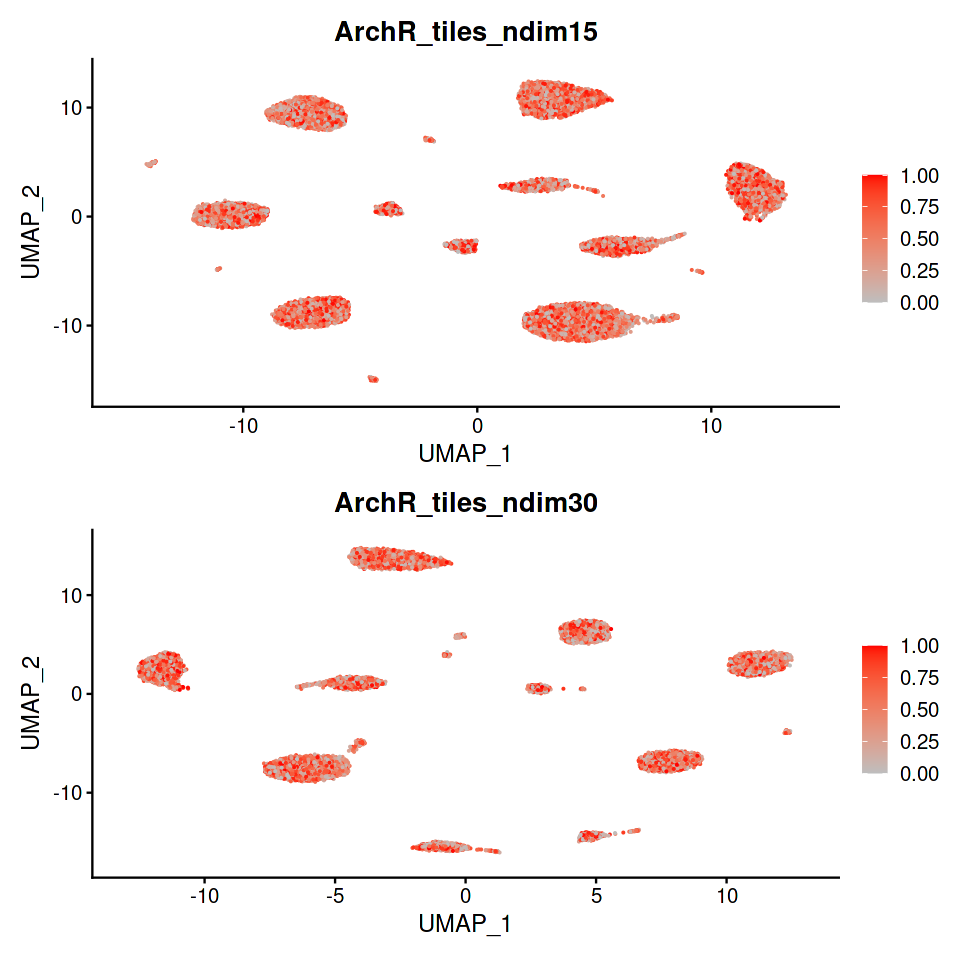

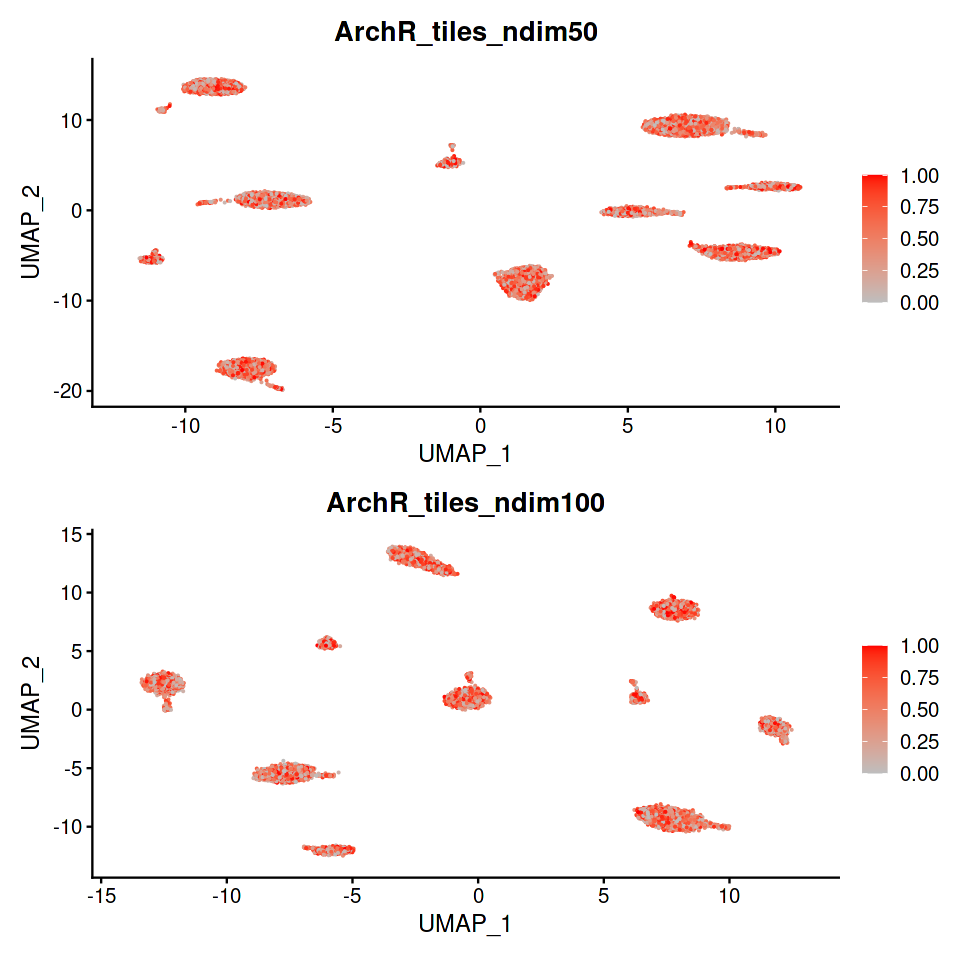

In [12]:
options(repr.plot.width=8, repr.plot.height=8)
par(mfrow=c(2,2))
n <- 15
p5 <- FeaturePlot(sobj1, features = c("TSS.percentile"), cols = c("grey", "red")) + ggtitle(paste0(lm,"_ndim",n))
n <- 30
p6 <- FeaturePlot(sobj2, features = c("TSS.percentile"), cols = c("grey", "red")) + ggtitle(paste0(lm,"_ndim",n)) 
n <- 50
p7 <- FeaturePlot(sobj3, features = c("TSS.percentile"), cols = c("grey", "red")) + ggtitle(paste0(lm,"_ndim",n)) 
n <- 100
p8 <- FeaturePlot(sobj4, features = c("TSS.percentile"), cols = c("grey", "red")) + ggtitle(paste0(lm,"_ndim",n)) 

print(p5+p6)
print(p7+p8)

In [30]:
getwd()

[1] "/home/siluo/public/SiyuanLuo/projects/benchmark/outputs/Cell_line_mixing"

In [35]:
proj <- loadArchRProject(path = "~/public/SiyuanLuo/projects/benchmark/outputs/Cell_line_mixing/Cell_line_mixing/feature_engineering/R/ArchR/tiles/500/default/proj", force = FALSE, showLogo = FALSE)

Successfully loaded ArchRProject!



In [36]:
proj <- addDoubletScores(
    input = proj,
    k = 10, #Refers to how many cells near a "pseudo-doublet" to count.
    knnMethod = "UMAP", #Refers to the embedding to use for nearest neighbor search with doublet projection.
    LSIMethod = 1
)

ArchR logging to : ArchRLogs/ArchR-addDoubletScores-6cc797a4c81-Date-2023-05-05_Time-13-02-49.log
If there is an issue, please report to github with logFile!

2023-05-05 13:02:50 : Batch Execution w/ safelapply!, 0 mins elapsed.

2023-05-05 13:02:50 : CellinFile1 (1 of 1) :  Computing Doublet Statistics, 0.002 mins elapsed.

CellinFile1 (1 of 1) : UMAP Projection R^2 = 0.99917

CellinFile1 (1 of 1) : UMAP Projection R^2 = 0.99917

ArchR logging successful to : ArchRLogs/ArchR-addDoubletScores-6cc797a4c81-Date-2023-05-05_Time-13-02-49.log



In [37]:
a <- readRDS("~/public/SiyuanLuo/projects/benchmark/outputs/Cell_line_mixing/Cell_line_mixing/feature_engineering/R/ArchR/tiles/500/default/proj/CellinFile1/CellinFile1-Doublet-Summary.rds")

In [44]:
a

List of length 3
names(3): originalDataUMAP simulatedDoubletUMAP doubletResults

In [45]:
names(a$doubletResults)$

[1] "doubletUMAP"           "projectionCorrelation" "doubletEnrichLSI"     
[4] "doubletScoreLSI"       "doubletEnrichUMAP"     "doubletScoreUMAP"

In [62]:
sobj1$doubletEnrich <- a$doubletResults$doubletEnrichLSI[paste0("CellinFile1#",rownames(sobj1[[]]))]
sobj2$doubletEnrich <- a$doubletResults$doubletEnrichLSI[paste0("CellinFile1#",rownames(sobj2[[]]))]
sobj3$doubletEnrich <- a$doubletResults$doubletEnrichLSI[paste0("CellinFile1#",rownames(sobj3[[]]))]
sobj4$doubletEnrich <- a$doubletResults$doubletEnrichLSI[paste0("CellinFile1#",rownames(sobj4[[]]))]

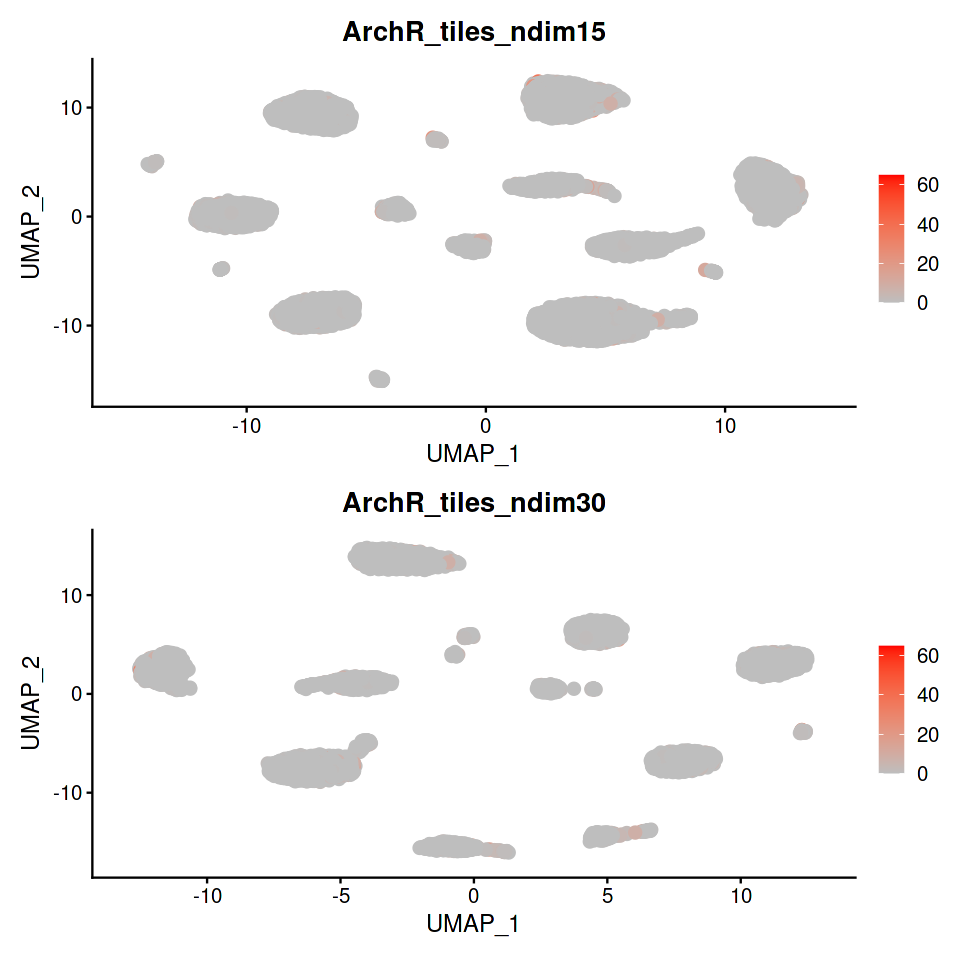

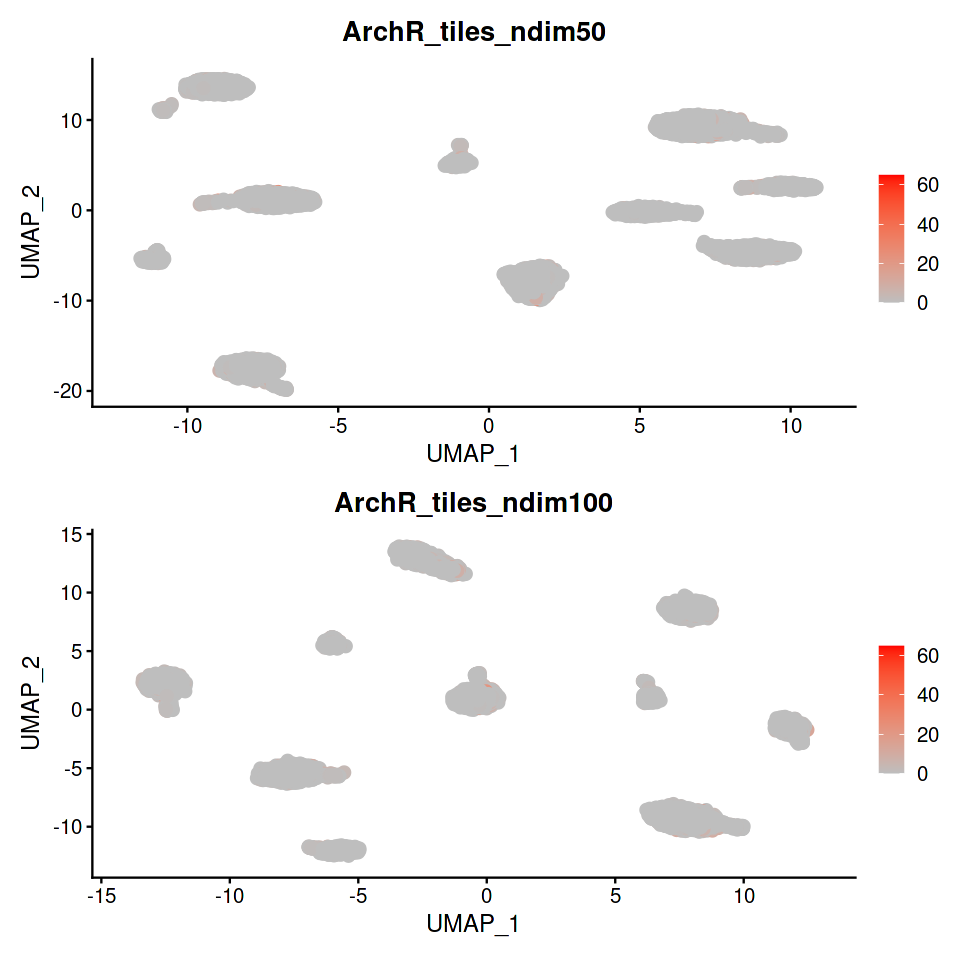

In [65]:
n <- 15
p5 <- FeaturePlot(sobj1, features = c("doubletEnrich"), cols = c("grey", "red"),pt.size=3) + ggtitle(paste0(lm,"_ndim",n))
n <- 30
p6 <- FeaturePlot(sobj2, features = c("doubletEnrich"), cols = c("grey", "red"),pt.size=3) + ggtitle(paste0(lm,"_ndim",n)) 
n <- 50
p7 <- FeaturePlot(sobj3, features = c("doubletEnrich"), cols = c("grey", "red"),pt.size=3) + ggtitle(paste0(lm,"_ndim",n)) 
n <- 100
p8 <- FeaturePlot(sobj4, features = c("doubletEnrich"), cols = c("grey", "red"),pt.size=3) + ggtitle(paste0(lm,"_ndim",n)) 

print(p5+p6)
print(p7+p8)
